# Diagramas de Bode

En este notebook mostraremos el uso de [Python Control Systems Library](https://github.com/python-control/python-control) para crear y modificar diagramas de Bode. La documentación de *control systems library* está disponible en el siguiente [*Link*](http://python-control.readthedocs.io/en/latest/).

## Inicio

Instalación básica [Python Control Systems Library](https://github.com/python-control/python-control). Pero en el uso con **Colab** no será necesario.

La biblioteca es *imported* con la instrucción `control`. Recordar no utilizar nombres propios de python para evitar conflictos en el sistema.

La bilioteca tiene un `bug` donde hace uso el comando obsoleto `hold` de matplotlib. Esto da como resultado que se emitan advertencias. Utilice la biblioteca de *warnings* para desactivar estas advertencias que distraen.



### Instalamos la bilioteca *control* con el comando `pip`.

In [ ]:
#!pip install control
try:
  import control as ct
  print("python-control", ct.__version__)
except ImportError:
  !pip install control
  import control as ct

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.0 MB/s eta 0:00:00


### Cargamos otras bibliotecas necesarias

In [ ]:
%matplotlib inline
import numpy as np              #numpy bilioteca de operaciones matemáticas
import matplotlib.pyplot as plt #matplotlib para "plotear" los gráficos
#import control as ct            #control biblioteca para operar Bode
import control

import warnings
warnings.filterwarnings('ignore')

[link text](https://)## Creando diagramas de Bode

### Función de transferencia

Dada la siguiente función de transferencia

$$G(s) = 0.2 \frac{0.5s + 1}{1.5s^2 + 0.5 s + 1}$$

representar matemáticamente la función.

In [ ]:
# La función es una operación entre polinomios (Numerador/Denominador)
# Los coeficientes de mayor grado están a la izquierda y se completan todos. si hay uno nulo se coloca un `cero`.

Gtf = 10*control.tf([1,2],[1,110,1000])
print(Gtf)

<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    10 s + 20
------------------
s^2 + 110 s + 1000



### Gráfico de Bode por defecto

La función `control.bode()` devuelve relaciones de amplitud, desfasaje y frecuencia en rad/seg para determinada función de transferencia.

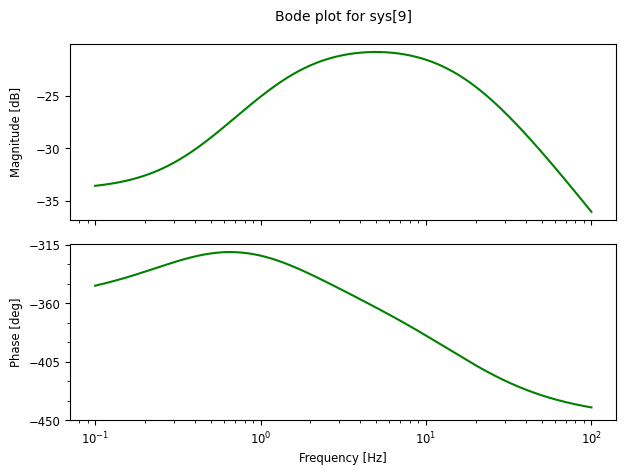

In [ ]:
#mag,phase,omega = control.bode(Gtf,dB=True,Hz=True, grid=False, color="green")
#mag,phase, omega = control.bode(G)
control.bode_plot(Gtf,dB=True,Hz=True, grid=False, color="green")

In [ ]:
#print(mag)

NameError: name 'mag' is not defined

### Especificar rango de frecuencia

Por defecto la función graficada por `Bode`es muy amplia. Usando `numpy.logspace()` podemos especificar el rango requerido de frecuencias el cuál se evaluara en el gráfico. Estas frecuencias estań indicadas por radianes por unidad de tiempo.

In [ ]:
w = np.logspace(-2,3,100)
mag,phase,omega = control.bode(G,w, color="violet")

NameError: name 'np' is not defined

### Otras opciones en el gráfico de Bode

Los diagrams de Bode pueden ser configurados con diferentes opciones. Como por ejemplo, como argumento de `control.bode`podemos agregar `Hz=True`para cambiar en el diagrama el eje abcisa por Hz en vez de rad/seg. Esto es sólo en la imagen. Luego en las operaciones matemáticas utilizamos raadianes por unidad de tiempo.

TypeError: iter() returned non-iterator of type 'numpy.ndarray'

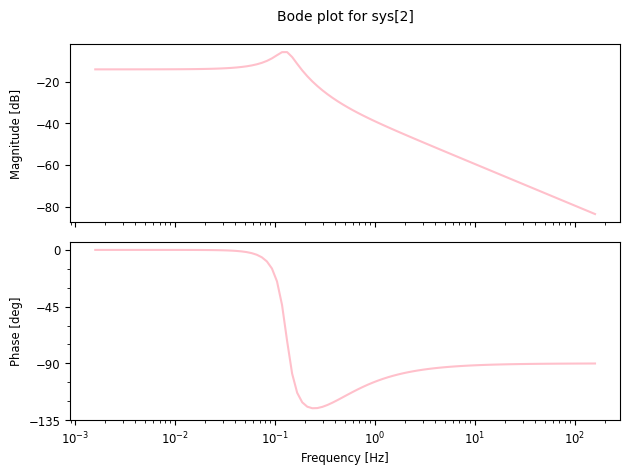

In [ ]:
mag,phase,omega = control.bode(G,w,Hz=True,dB=True,deg=True, grid=False, color="pink")

## Mis ejemplos punto1

cero al cubo

<TransferFunction>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-4 s^3
------
s + 4

Polos: [-4.+0.j]
Zeros: [0.+0.j 0.+0.j 0.+0.j]


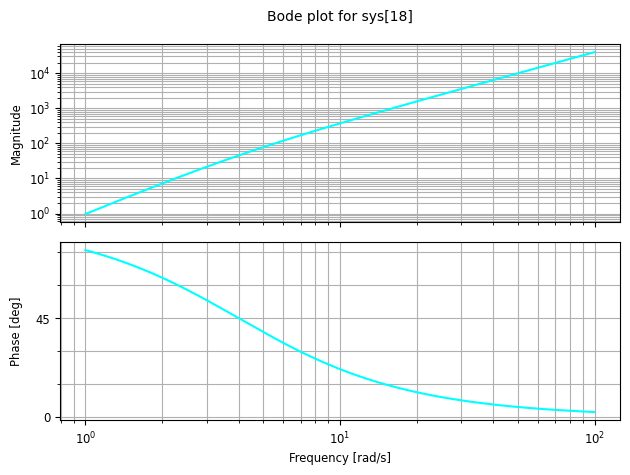

In [ ]:
#punto 1 a
#num = 4
#den = np.array([1, 4])
#H=control.tf(num,den)
H=4*control.tf([-1,0,0,0],[1,4])
print(H)
control.bode_plot(H,wrap_phase=True,color='cyan')
#[mag, phase, omega] =control.bode(H,wrap_phase=True,color='cyan')
#mag, phase,omega =control.bode(H,color='cyan')
#Antes 25/08
#print('Polos',control.poles(H))
print('Polos:',H.poles())
#print('Zeros',control.zeros(H))
print('Zeros:',H.zeros())


### Ejemplo
$$G(s) = \frac{s + 10}{(s + 1)(s + 100)}$$

In [ ]:
import control.matlab as ml

In [ ]:
num = np.array([1, 10])
den = np.polymul(np.array([1, 1]), np.array([1, 100]))
G = ml.tf(num, den)
print(G)

<TransferFunction>: sys[50]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     s + 10
-----------------
s^2 + 101 s + 100



In [ ]:
ml.pole(G)

array([-100.+0.j,   -1.+0.j])

In [ ]:
ml.zero(G)

array([-10.+0.j])

<function matplotlib.pyplot.show(close=None, block=None)>

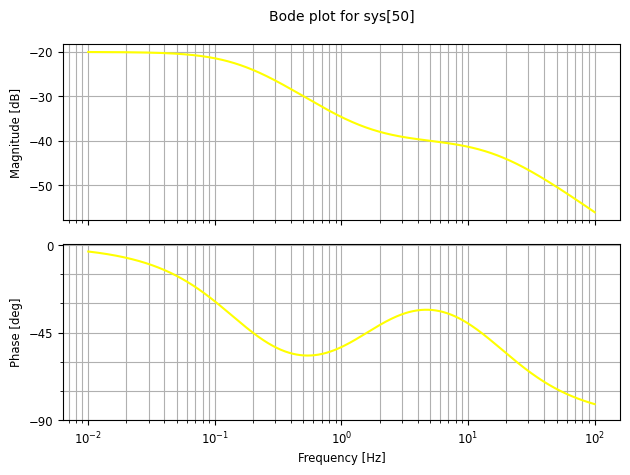

In [ ]:
mag,phase,w = ml.bode(G,Hz=True,plot=True,grid=True,color='yellow')
plt.show

In [ ]:
num = np.array([2.48e19])
den1 = np.polymul(np.array([1, 628]), np.array([1, 62800]))
den = np.polymul(den1, np.array([1, 6280000]))
G1 = ml.tf(num, den)
print(G1)

<TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                  2.48e+19
---------------------------------------------
s^3 + 6.343e+06 s^2 + 3.984e+11 s + 2.477e+14



<function matplotlib.pyplot.show(close=None, block=None)>

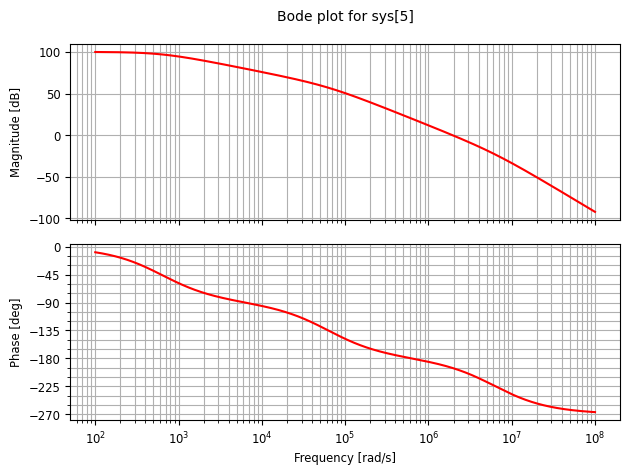

In [ ]:
mag,phase,w = ml.bode(G1,plot=True,grid=True,color='red')
plt.show

### Ejemplo polo complejo con cero y polo simple

In [ ]:
num = np.array([100000, 0])
den = np.polymul(np.array([1, 1]), np.array([1, 20, 10000]))
G1 = ml.tf(num, den)
print(G1)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


             1e+05 s
----------------------------------
s^3 + 21 s^2 + 1.002e+04 s + 1e+04



<function matplotlib.pyplot.show(close=None, block=None)>

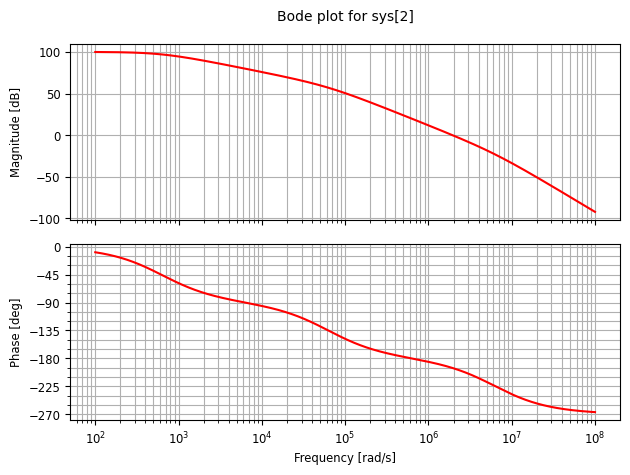

In [ ]:
mag,phase,w = ml.bode(G1,plot=True,grid=True,color='red')
plt.show

### Ejemplo polo complejo

In [ ]:
num = np.array([1])
den = np.array([1, 20, 10000])
G2 = ml.tf(num, den)
print(G2)


        1
------------------
s^2 + 20 s + 1e+04



<function matplotlib.pyplot.show(close=None, block=None)>

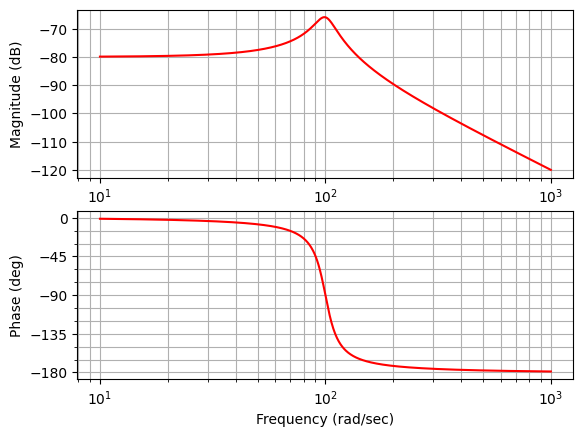

In [ ]:
mag,phase,w = ml.bode(G2,plot=True,grid=True,color='red')
plt.show